# Introduction

### Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces. Learning how to use Machine Learning can help us predict Diabetes. Let’s get started!

# Aim of the Project

### 1) The objective of this project is to classify whether someone has diabetes or not.
### 2) Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
### 3) The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
### 4) The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

# About the Dataset

* ### Pregnancies :- Number of times a woman has been pregnant
* ### Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
* ### BloodPressure :- Diastollic Blood Pressure (mm hg)
* ### SkinThickness :- Triceps skin fold thickness(mm)
* ### Insulin :- 2 hour serum insulin(mu U/ml)
* ### BMI :- Body Mass Index ((weight in kg/height in m)^2)
* ### Age :- Age(years)
* ### DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)
* ### Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

# Importing necessary libraries


In [1]:
import numpy as np                                      # To perform wide variety of mathematical operations on arrays.
import pandas as pd                                     # which is used to data cleaning, processing and analysis.
import matplotlib.pyplot as plt                         # Data visualization and graphical plotting.
import seaborn as sns                                   # Making the statistical graphics.
import plotly.express as px                             # used for creating eantaire figure at once
import missingno as mns                                 # Identifying the missing data within the dataframe

# Loadin the Dataset

In [11]:
from google.colab import files
uploaded = files.upload()

Saving Diabetes.csv to Diabetes.csv


In [39]:
df = pd.read_csv('/content/Diabetes.csv',encoding = 'unicode_escape')           # Reading the data set
df                                              

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Exploration of Data

### i) Understanding the Dataset

In [17]:
df.head()                                                                       # using header function it will print first 5 rows

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.tail()                                                                       # using tail function it will print bottom 5 rows

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [19]:
df.shape                                                                        # Checking the Number of rows and columns

(768, 9)

* ### Rows    : 768
* ### Columns : 9

In [20]:
df.columns                                                                      # Checkin the columns names

Index([' Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness',
       'Insulin', ' BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome'],
      dtype='object')

In [21]:
df.dtypes                                                                       # knowledge of data type columns for further computation

 Pregnancies                    int64
Glucose                         int64
Blood Pressure                  int64
Skin Thickness                  int64
Insulin                         int64
 BMI                          float64
Diabetes Pedigree Function    float64
Age                             int64
Outcome                         int64
dtype: object

* ### Datatypes all features are "Int" except BMI and Diabetes Pedigree Fuction are "float".

In [22]:
df.info()                                                                       # Getting the information of the data set like columns,datatypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0    Pregnancies                768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5    BMI                        768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df.describe()                                                                   # Statistical Summery  of the dataset

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Observation 
 
* It helps to understand how the data spread accross the table. 
* count : It will show non-empty rows in the featurs.
* mean  : It calculate Mean of  the each feature.   
* std   : It calculate standerd deviation of the each feature.
* min   : It will show the minmum value of the each feature.
* max   : It will show the maximum value of the each feature.     

* We can observe that features like Glucose,Blood,Pressure,Skin,Thickness,Insulin,BMI are having min vallue is 0. which is not possible in reality.
* In Insuline feature max value is 846 which is an outlier as compared with mean of the Insuline value.
* The rest of the data is clean. we need to deal with outliers and empty sapces in the data set.
* we can replace them with mean/median and also we can perform log transfermation based on our requiredments.

### ii) Cleaning the Dataset

In [24]:
df. duplicated().sum()                                                          # Checking dulicate values and cummulating(adding) the all the values

0

### Observation: 

* We can observe that there are no Duplicate values in the dataset. So we need not to drop or alter the dataset.  

In [25]:
df.isnull().sum()                                        # Identifying null values and cummulating(adding) the all the values

 Pregnancies                  0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
 BMI                          0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

### Observation:
* From the above result is is  clear thta we dont have any null values in the Dataset. 

In [40]:
print(df[df['Blood Pressure']==0].shape[0])                                     # Printing numbet of "0" values in the Blood Pressure.                                           
print(df[df['Glucose']==0].shape[0])                                            # Printing numbet of "0" values in the Glucose.
print(df[df['Skin Thickness']==0].shape[0])                                     # Printing numbet of "0" values in the Skin Thickness.
print(df[df['Insulin']==0].shape[0])                                            # Printing numbet of "0" values in the Insulin.
print(df[df[' BMI']==0].shape[0])                                               # Printing numbet of "0" values in the BMI.

35
5
227
374
11


### Observation:

* As we can see from the above reslut that there are "0" values in the dataset which is not possible medically.
* So we need to fill all this values with appropriate methods to get the better model.

### Replacing the values in the Dataset.



* Some of the columns have Skweed distribution. So we need to replace them with mean?median.
* But mean is more affected by outliers and median is less affected compare to mean.
* Glucose and Blood Pressure columns are normal distribution, so we need to replace the value 0 with 'mean' value for those columns.
* SkinThickness, Insulin,BMI are have skweed distribution, so we need to replace the value 0 with 'median' value because median is less affected by outliers.

In [41]:
#replacing 0 values with median of that column

df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())                        #normal distribution
df['Blood Pressure']=df['Blood Pressure'].replace(0,df['Blood Pressure'].mean())   #normal distribution
df['Skin Thickness']=df['Skin Thickness'].replace(0,df['Skin Thickness'].median()) #skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())                      #skewed distribution
df[' BMI']=df[' BMI'].replace(0,df[' BMI'].median())                               #skewed distribution

# Data Visuvalization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


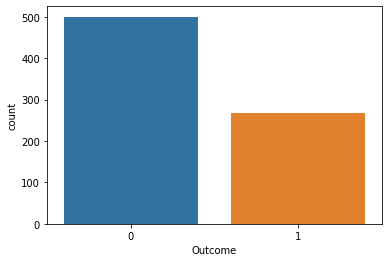

In [32]:
sns.countplot('Outcome',data=df)                                                # Creating the count plot for "Outcome" column           

### Observation:
* We can observe that perople who don't have diabetes is more compared to people who have diabetes. 
* which indicates that data is imbalance. 

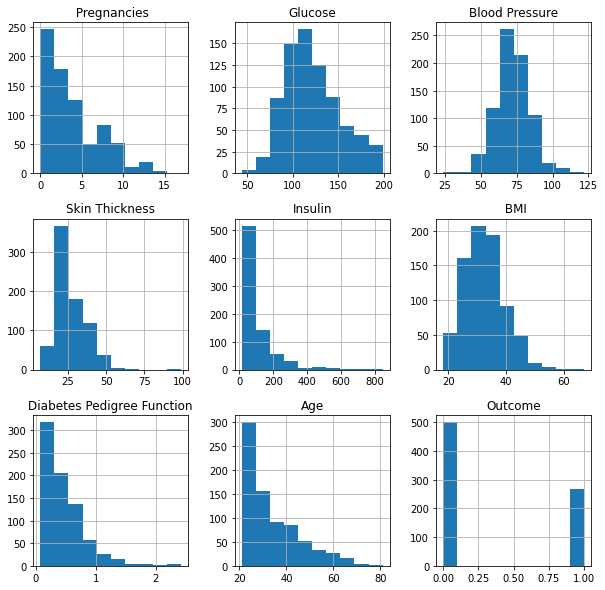

In [33]:
df.hist(bins=10,figsize=(10,10))                                                # Creating the Histograme for each column.  
plt.show()

### Observation :
* Only Glucouse and BMI are normally distributed and the rest of the columns are skweed distribution. 

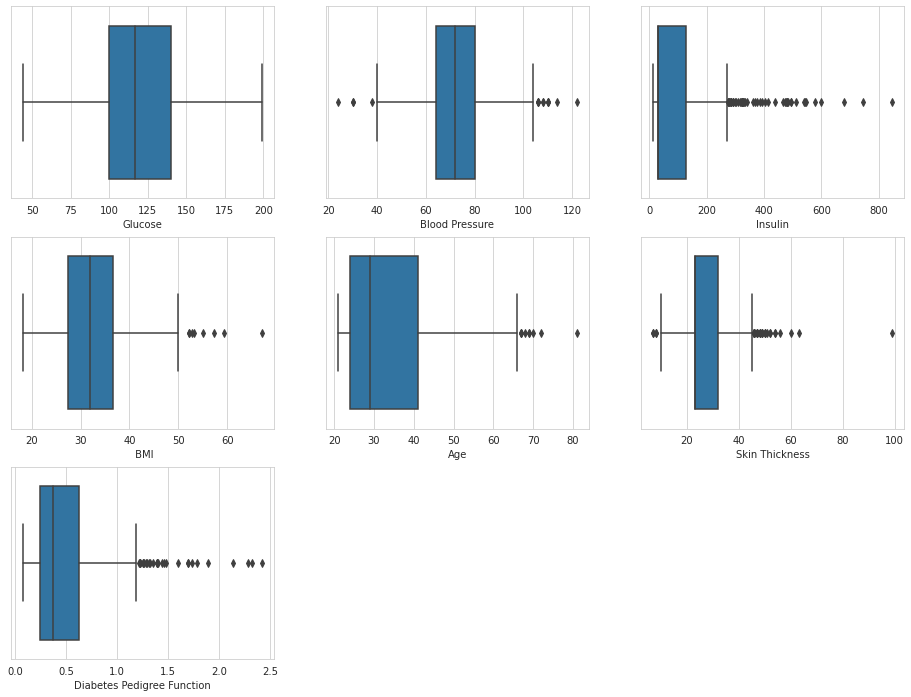

In [45]:
# Creating box plot foe each column

plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='Blood Pressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x=' BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='Skin Thickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Diabetes Pedigree Function',data=df)

### Observation:

* Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions.
* Hence it is of utmost importance to deal with them
* In this case removing outliers can cause data loss so we have to deal with it using various scaling and transformation techniques.

In [46]:
df.corr()                                                                       # Checking the correlation between the columns        

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.172361,0.357081,0.231469,0.137106,0.266600,0.492908
Blood Pressure,0.208984,0.219666,1.000000,0.152458,-0.022049,0.281232,0.000371,0.326740,0.162986
Skin Thickness,0.032568,0.172361,0.152458,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357081,-0.022049,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231469,0.281232,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
Diabetes Pedigree Function,-0.033523,0.137106,0.000371,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


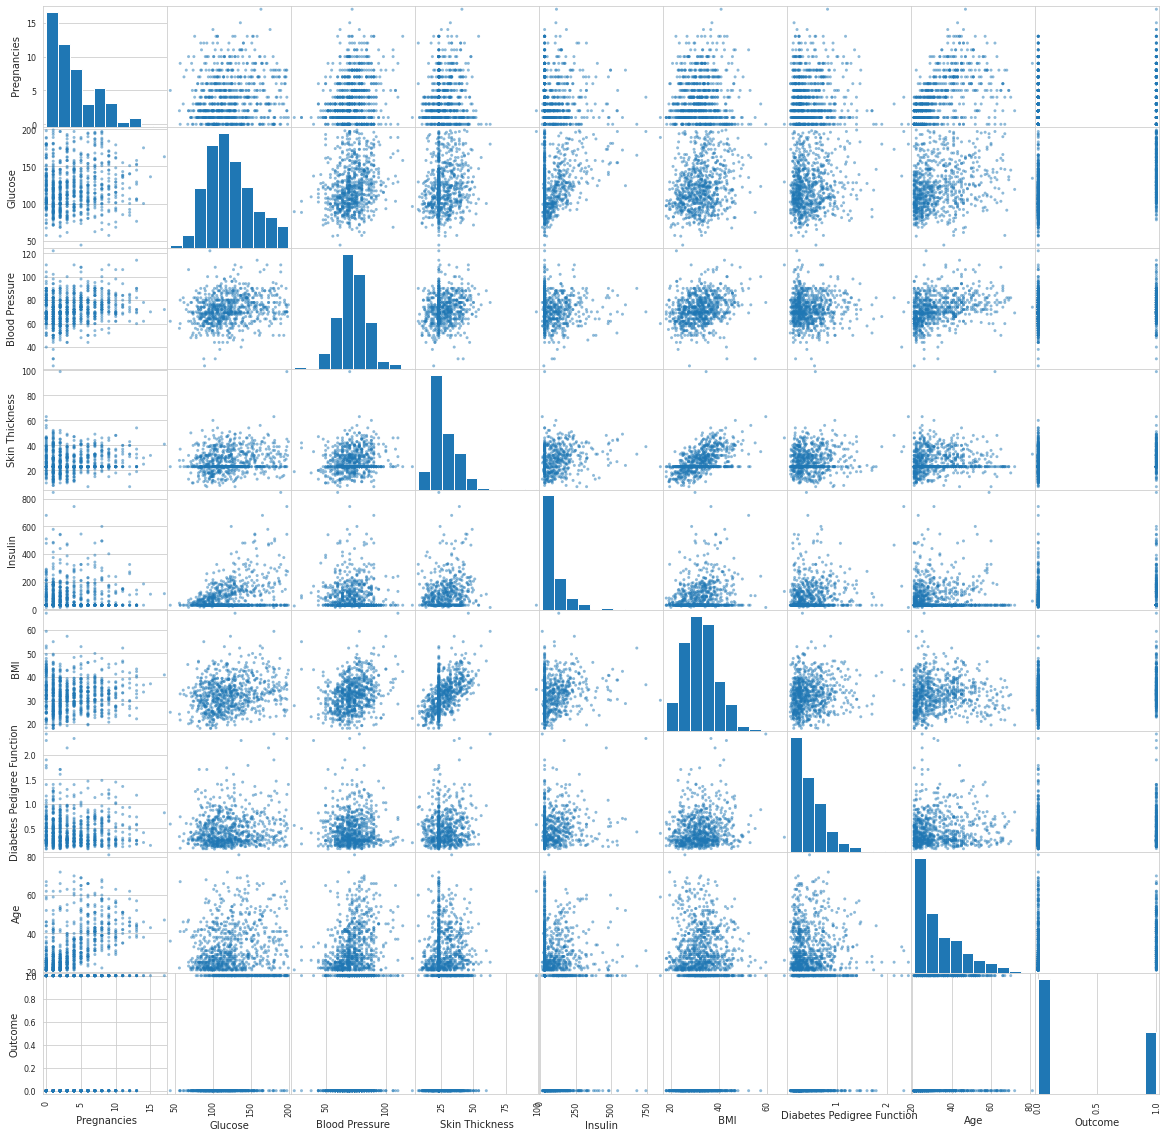

In [48]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));                                             # Plottng the scatter plot to see the relation between the each column.        

### Observation :

* From the above correlation we can make  it out number of conclusions. some them are
* Number of pregnancies increses the insuline level is low.
* Increasing the age decreasing the insuline.  
* Higher the Blood prassure lower the insuline. 

# Feature Selection

### Pearson Correlation:
* Helps you find out the relationship between two quantities. 
* It gives you the measure of the strength of association between two variables. 
* The value of Pearson's Correlation Coefficient can be between -1 to +1. 
* 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

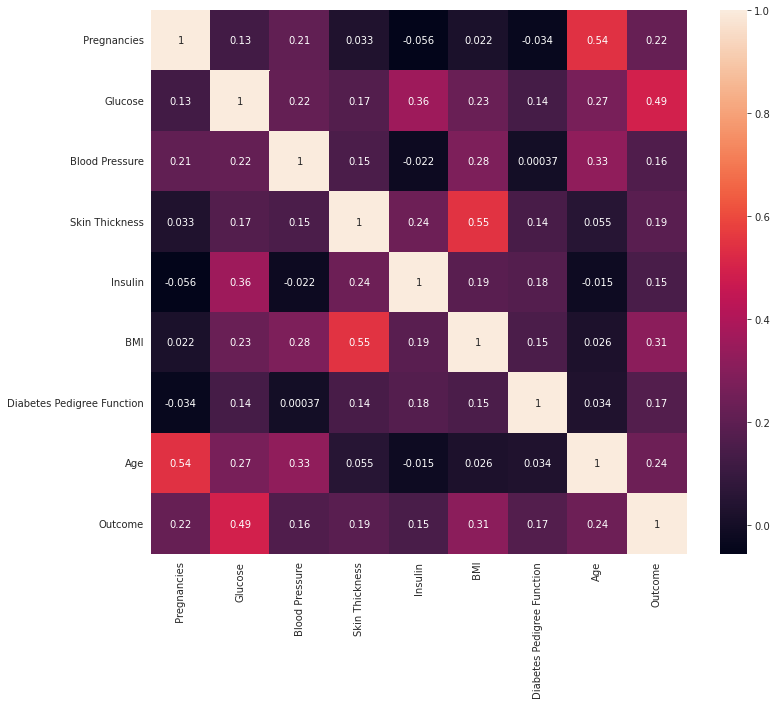

In [49]:
plt.figure(figsize = (12,10))                                                          

sns.heatmap(df.corr(), annot =True)                                             # Plotting heat map to chech the correlation

### Observation :
* Observe the last row 'Outcome' and note its correlation scores with different features.
* We can observe that Glucose, BMI and Age are the most correlated with Outcome. 
* BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model so we can drop them.

In [52]:
df_selected=df.drop(['Blood Pressure','Insulin','Diabetes Pedigree Function'],axis= 1)  # Droping the unnecessary columns

# Handling Outliers

An outlier is a data point in a data set that is distant from all other observations.

### By Using Quantile Transformer:
* This method transforms the features to follow a uniform or a normal distribution.
* Therefore, for a given feature, this transformation tends to spread out the most frequent values.
* It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

In [56]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  "X does not have valid feature names, but"


,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


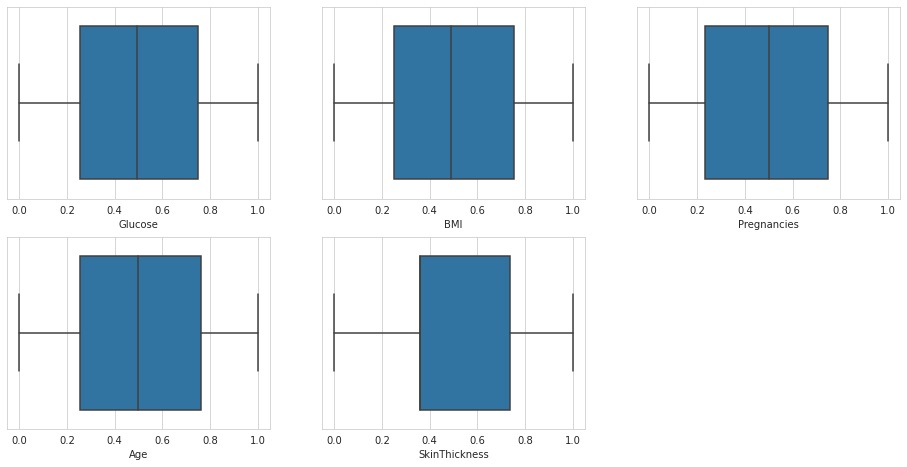

In [60]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

# Spliting the Data Frame into X and Y

In [61]:
target_name='Outcome'
y= df_new[target_name]                                                          # given predictions - training data 
X=df_new.drop(target_name,axis=1)                                               # dropping the Outcome column and keeping all other columns as X

In [62]:
X.head()                                                                        # contains only independent features

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [63]:
y.head()                                                                        #contains dependent feature

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

# Training Test Split

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)    #splitting data in 80% train, 20%test

In [65]:
X_train.shape,y_train.shape                                                     # checking the number of rows and columns for train model

((614, 5), (614,))

In [66]:
X_test.shape,y_test.shape                                                       # checking the number of rows and columns for test model

((154, 5), (154,))

# Classifications

* ### KNN
* ### Decision Tree
* ### Random Forest

### 1) KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [68]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [69]:
best_model = grid_search.fit(X_train,y_train)

In [70]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 19


In [71]:
#Predict testing set
knn_pred = best_model.predict(X_test)

In [89]:
# Calculating the accuracy for the model
accuracy_score(y_test,knn_pred)* 100

80.51948051948052

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       107
         1.0       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154


 F1:
 0.6666666666666666

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



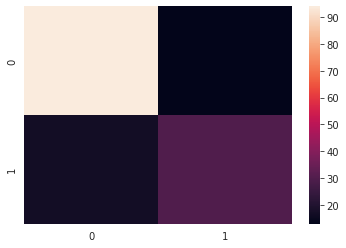

In [72]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

### Observataion :
* From the above model we can observe that accuracy of the model is 80.51%

### 2) Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
from sklearn.metrics import accuracy_score

In [75]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [76]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [77]:
best_model=grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [78]:
dt_pred=best_model.predict(X_test)

In [88]:
# Calculating the accuracy for the model
accuracy_score(y_test,dt_pred)* 100

79.22077922077922

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       107
         1.0       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 F1:
 0.5675675675675675

 Precision score is:
 0.7777777777777778

 Recall score is:
 0.44680851063829785

 Confusion Matrix:



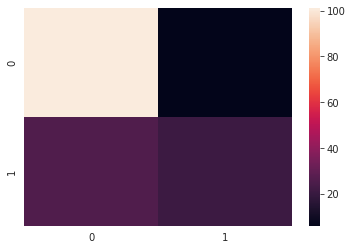

In [79]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))

### Observataion :
* From the above model we can observe that accuracy of the model is 79.22%

### 3) Random Forest

The "forest" references a collection of uncorrelated decision trees, which are then merged together to reduce variance and create more accurate data predictions.

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [81]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [82]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [83]:
best_model = grid_search.fit(X_train, y_train)

In [84]:
rf_pred=best_model.predict(X_test)

In [87]:
# Calculating the accuracy for the model
accuracy_score(y_test,rf_pred)* 100

78.57142857142857

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.85      0.84      0.85       107
         1.0       0.65      0.66      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.6666666666666666

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



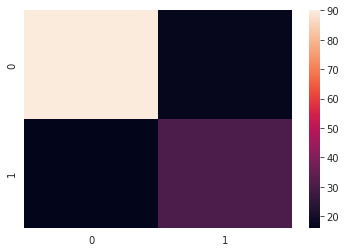

In [85]:
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rf_pred))

### Observataion :
* From the above model we can observe that accuracy of the model is 78.57%

# Conclusion 

### AIM: 

* The objective of this project is to classify whether someone has diabetes or not.
*  Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
* The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
* The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

### What we do in this project so far ?

1. Importing Required Libraries

2. Loading the Dataset

3. Exploratory Data Analysis
4. Data Visualization
5. Feature Selection

6. Handling Outliers

7. Split the Data Frame into X and y

8. TRAIN TEST SPLIT

9. Build the Classification Algorithm

* KNN Model
* Decision Tree Model
* Random Forest Model

### what Insights get from the above models and which one is better?

### 1) KNN Model

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       107
         1.0       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154


 F1:
 0.6666666666666666

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.6382978723404256

 * From the above model we can observe that accuracy of the model is 80.51%

## 2) Decision Tree Model:

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       107
         1.0       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 F1:
 0.5675675675675675

 Precision score is:
 0.7777777777777778

 Recall score is:
 0.44680851063829785

* From the above model we can observe that accuracy of the model is 79.22%



## 3) Random Forest Model :

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.85      0.84      0.85       107
         1.0       0.65      0.66      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.6666666666666666

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.6382978723404256

 * From the above model we can observe that accuracy of the model is 78.57%

 ## From  all the above models KNN model is the most accurate one.
